# Разведочный анализ данных. Исследование и визуализация данных.

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считывание данных из датасета

In [2]:
df = pd.read_csv("bgg_dataset.csv", sep=";")

## Основная информация о датасете

Выведем первые 5 строк

In [3]:
df.head()

ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated Rating Average  BGG Rank  \
0            4        120       14        42055           8,79         1   
1            4         60       13        41643           8,61         2   
2            4        120       14        19217           8,66         3   
3            5        120       12        64864           8,43         4   
4            6        480       14        13468           8,70         5   

  Complexity Average  Owned Users  \
0               3,86      68323.0   
1               2,84      65294.0   
2               3,91      28785.0   
3               3,24      87099.0   
4               4,22      16831.0   

                                           Mechanics  \
0  Action Queue, Action Retrieval, Campaign / Bat...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Hand Management, Income, Loans, Market, Networ...   
3  Card Drafting, Drafting, End Game Bonuses, Han...   
4  Action Drafting, Area Majority / Influence, Ar...   

                          Domains  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

Выведем размер датасета

In [4]:
rows, columns = df.shape
print(f"Строк: {rows}, столбцов: {columns}")

Строк: 20343, столбцов: 14


Выведем столбцы датасета

In [5]:
df.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

In [6]:
df.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
BGG Rank                int64
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

Приведем колонки Rating Average и Complexity Average к типу float64

In [7]:
df['Rating Average'] = (
    df['Rating Average']
    .str.replace(',', '.', regex=False) 
    .astype(float)                       
)

df['Complexity Average'] = (
    df['Complexity Average']
    .str.replace(',', '.', regex=False) 
    .astype(float)                       
)

In [8]:
df.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

Проверим датасет на пустые значения

In [9]:
for column in df.columns:
    temp_null_count = df[df[column].isnull()].shape[0]
    print('{} - {}'.format(column, temp_null_count))

ID - 16
Name - 0
Year Published - 1
Min Players - 0
Max Players - 0
Play Time - 0
Min Age - 0
Users Rated - 0
Rating Average - 0
BGG Rank - 0
Complexity Average - 0
Owned Users - 23
Mechanics - 1598
Domains - 10159


Для удобства в этой работе удалим колонку Domains, в которой много пропусков, а также строки с пропусками

In [10]:
df.drop("Domains", axis = 1, inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(18739, 13)

In [13]:
for column in df.columns:
    temp_null_count = df[df[column].isnull()].shape[0]
    print('{} - {}'.format(column, temp_null_count))

ID - 0
Name - 0
Year Published - 0
Min Players - 0
Max Players - 0
Play Time - 0
Min Age - 0
Users Rated - 0
Rating Average - 0
BGG Rank - 0
Complexity Average - 0
Owned Users - 0
Mechanics - 0


Теперь выведем основные статистические характеристики датасета

In [14]:
df.describe()

ID  Year Published   Min Players   Max Players  \
count   18739.000000    18739.000000  18739.000000  18739.000000   
mean   110855.351406     1986.502802      2.010780      5.514328   
std     98925.635119      206.007980      0.689948     13.561482   
min         1.000000    -3500.000000      0.000000      0.000000   
25%     11637.500000     2001.000000      2.000000      4.000000   
50%     96564.000000     2011.000000      2.000000      4.000000   
75%    195200.000000     2016.000000      2.000000      6.000000   
max    331787.000000     2022.000000     10.000000    999.000000   

          Play Time       Min Age    Users Rated  Rating Average  \
count  18739.000000  18739.000000   18739.000000    18739.000000   
mean      95.928225      9.703559     899.535141        6.454696   
std      566.830699      3.618127    3651.469682        0.922802   
min        0.000000      0.000000      30.000000        1.050000   
25%       30.000000      8.000000      57.000000        5.880000   
50%       45.000000     10.000000     128.000000        6.480000   
75%       90.000000     12.000000     420.000000        7.070000   
max    60000.000000     25.000000  102214.000000        9.580000   

           BGG Rank  Complexity Average    Owned Users  
count  18739.000000        18739.000000   18739.000000  
mean    9839.130690            2.035550    1499.333689  
std     5847.392522            0.849703    5235.277935  
min        1.000000            0.000000       0.000000  
25%     4756.500000            1.360000     152.000000  
50%     9685.000000            2.000000     330.000000  
75%    14825.500000            2.600000     934.500000  
max    20344.000000            5.000000  155312.000000

## Визуальное исследование датасета

Диаграмма рассеяния

<Axes: xlabel='Min Age', ylabel='Users Rated'>

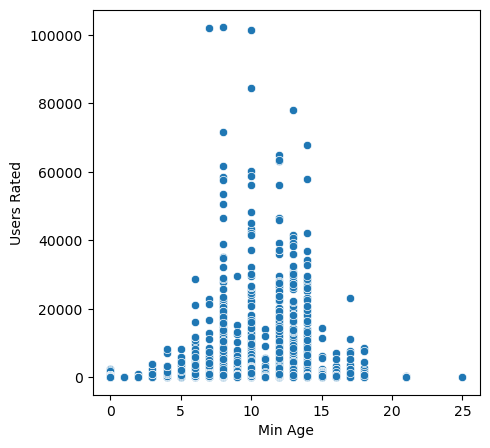

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='Min Age', y='Users Rated', data=df)

Добавим на гистограмму значения целевого признака

<Axes: xlabel='Min Age', ylabel='Users Rated'>

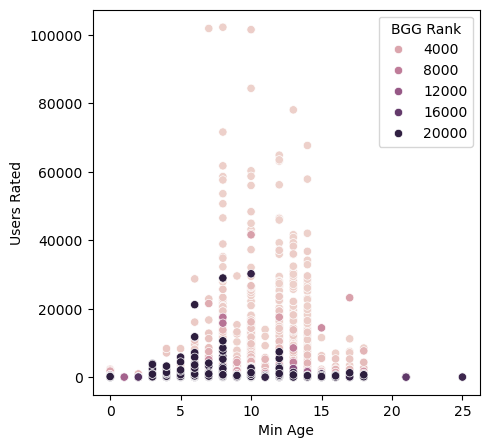

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='Min Age', y='Users Rated', hue="BGG Rank", data=df)

При помощи гистограммы можно оценить распределение величины

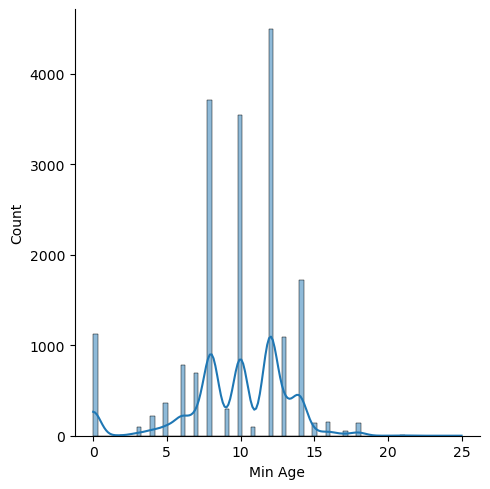

In [17]:
sns.displot(df['Min Age'], kde=True)

Теперь рассмотрим визуализацию с помощью Joinplot

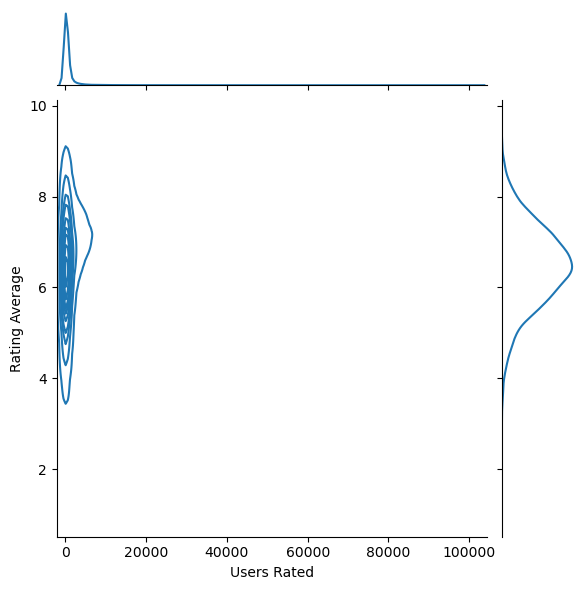

In [18]:
sns.jointplot(x='Users Rated', y='Rating Average', data=df, kind="kde")
plt.show()

Построим парные диаграммы по всему датафрейму

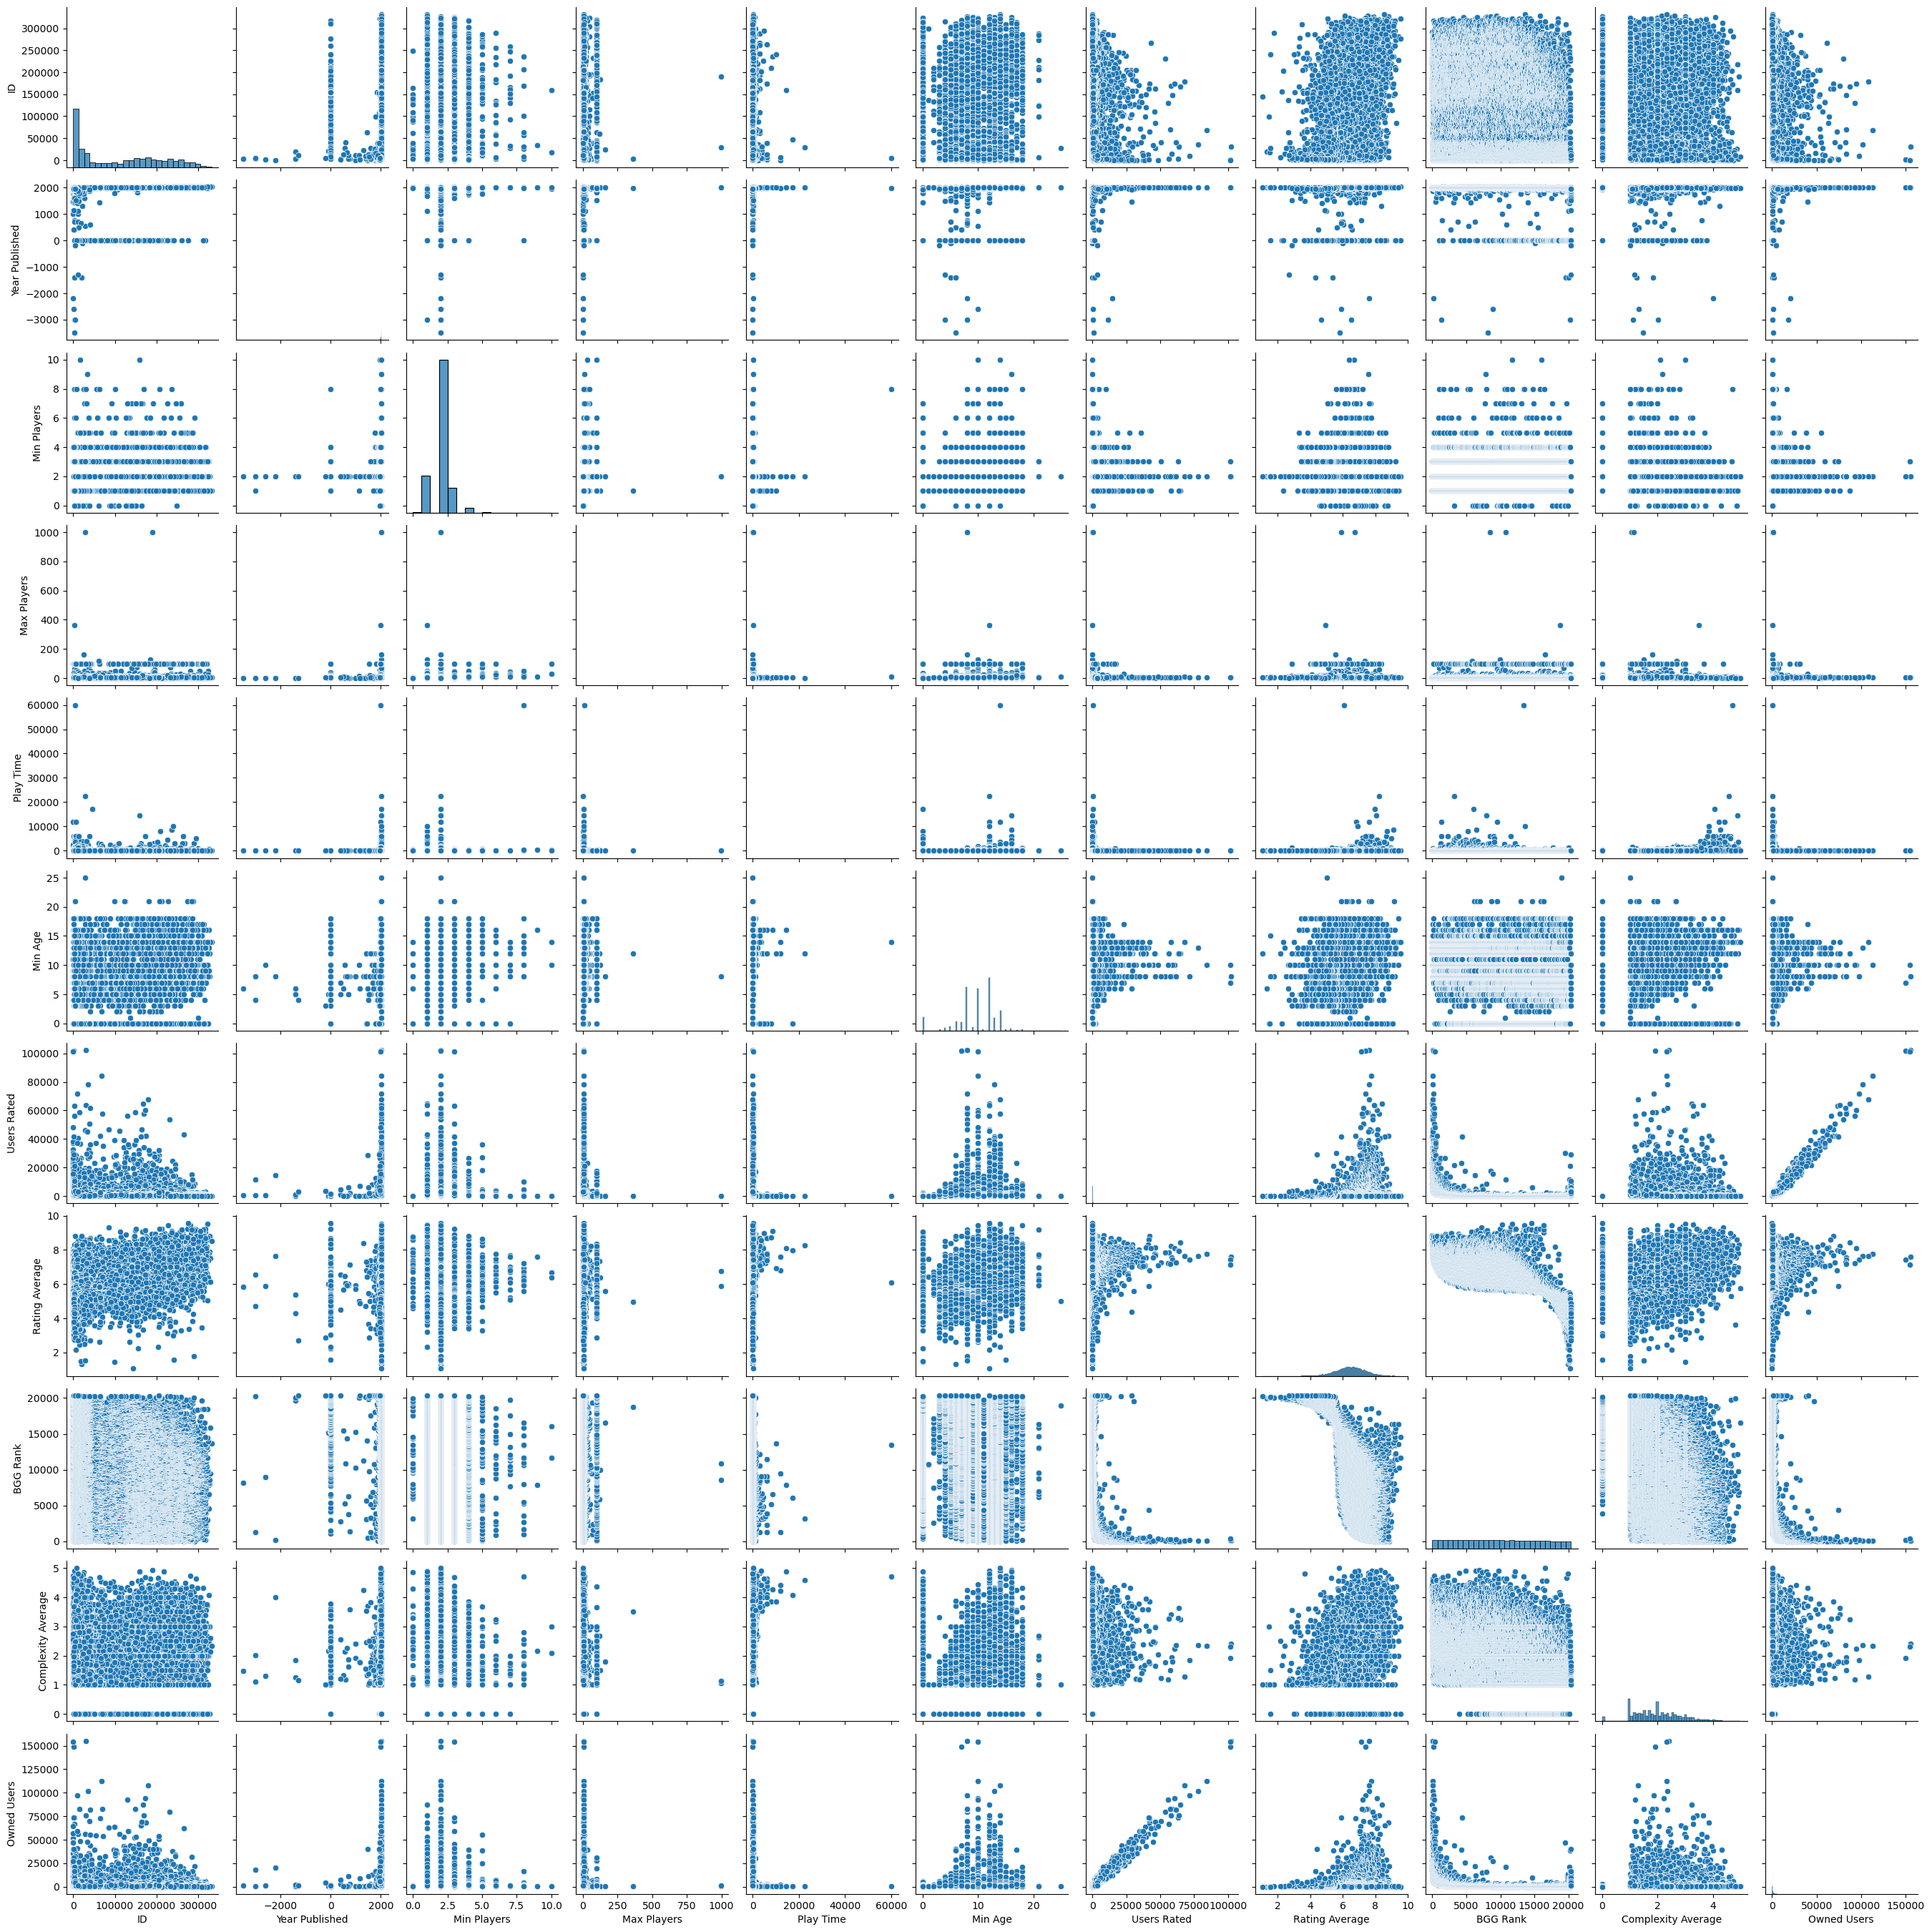

In [19]:
sns.pairplot(data=df)

Добавим группировку по рейтингу

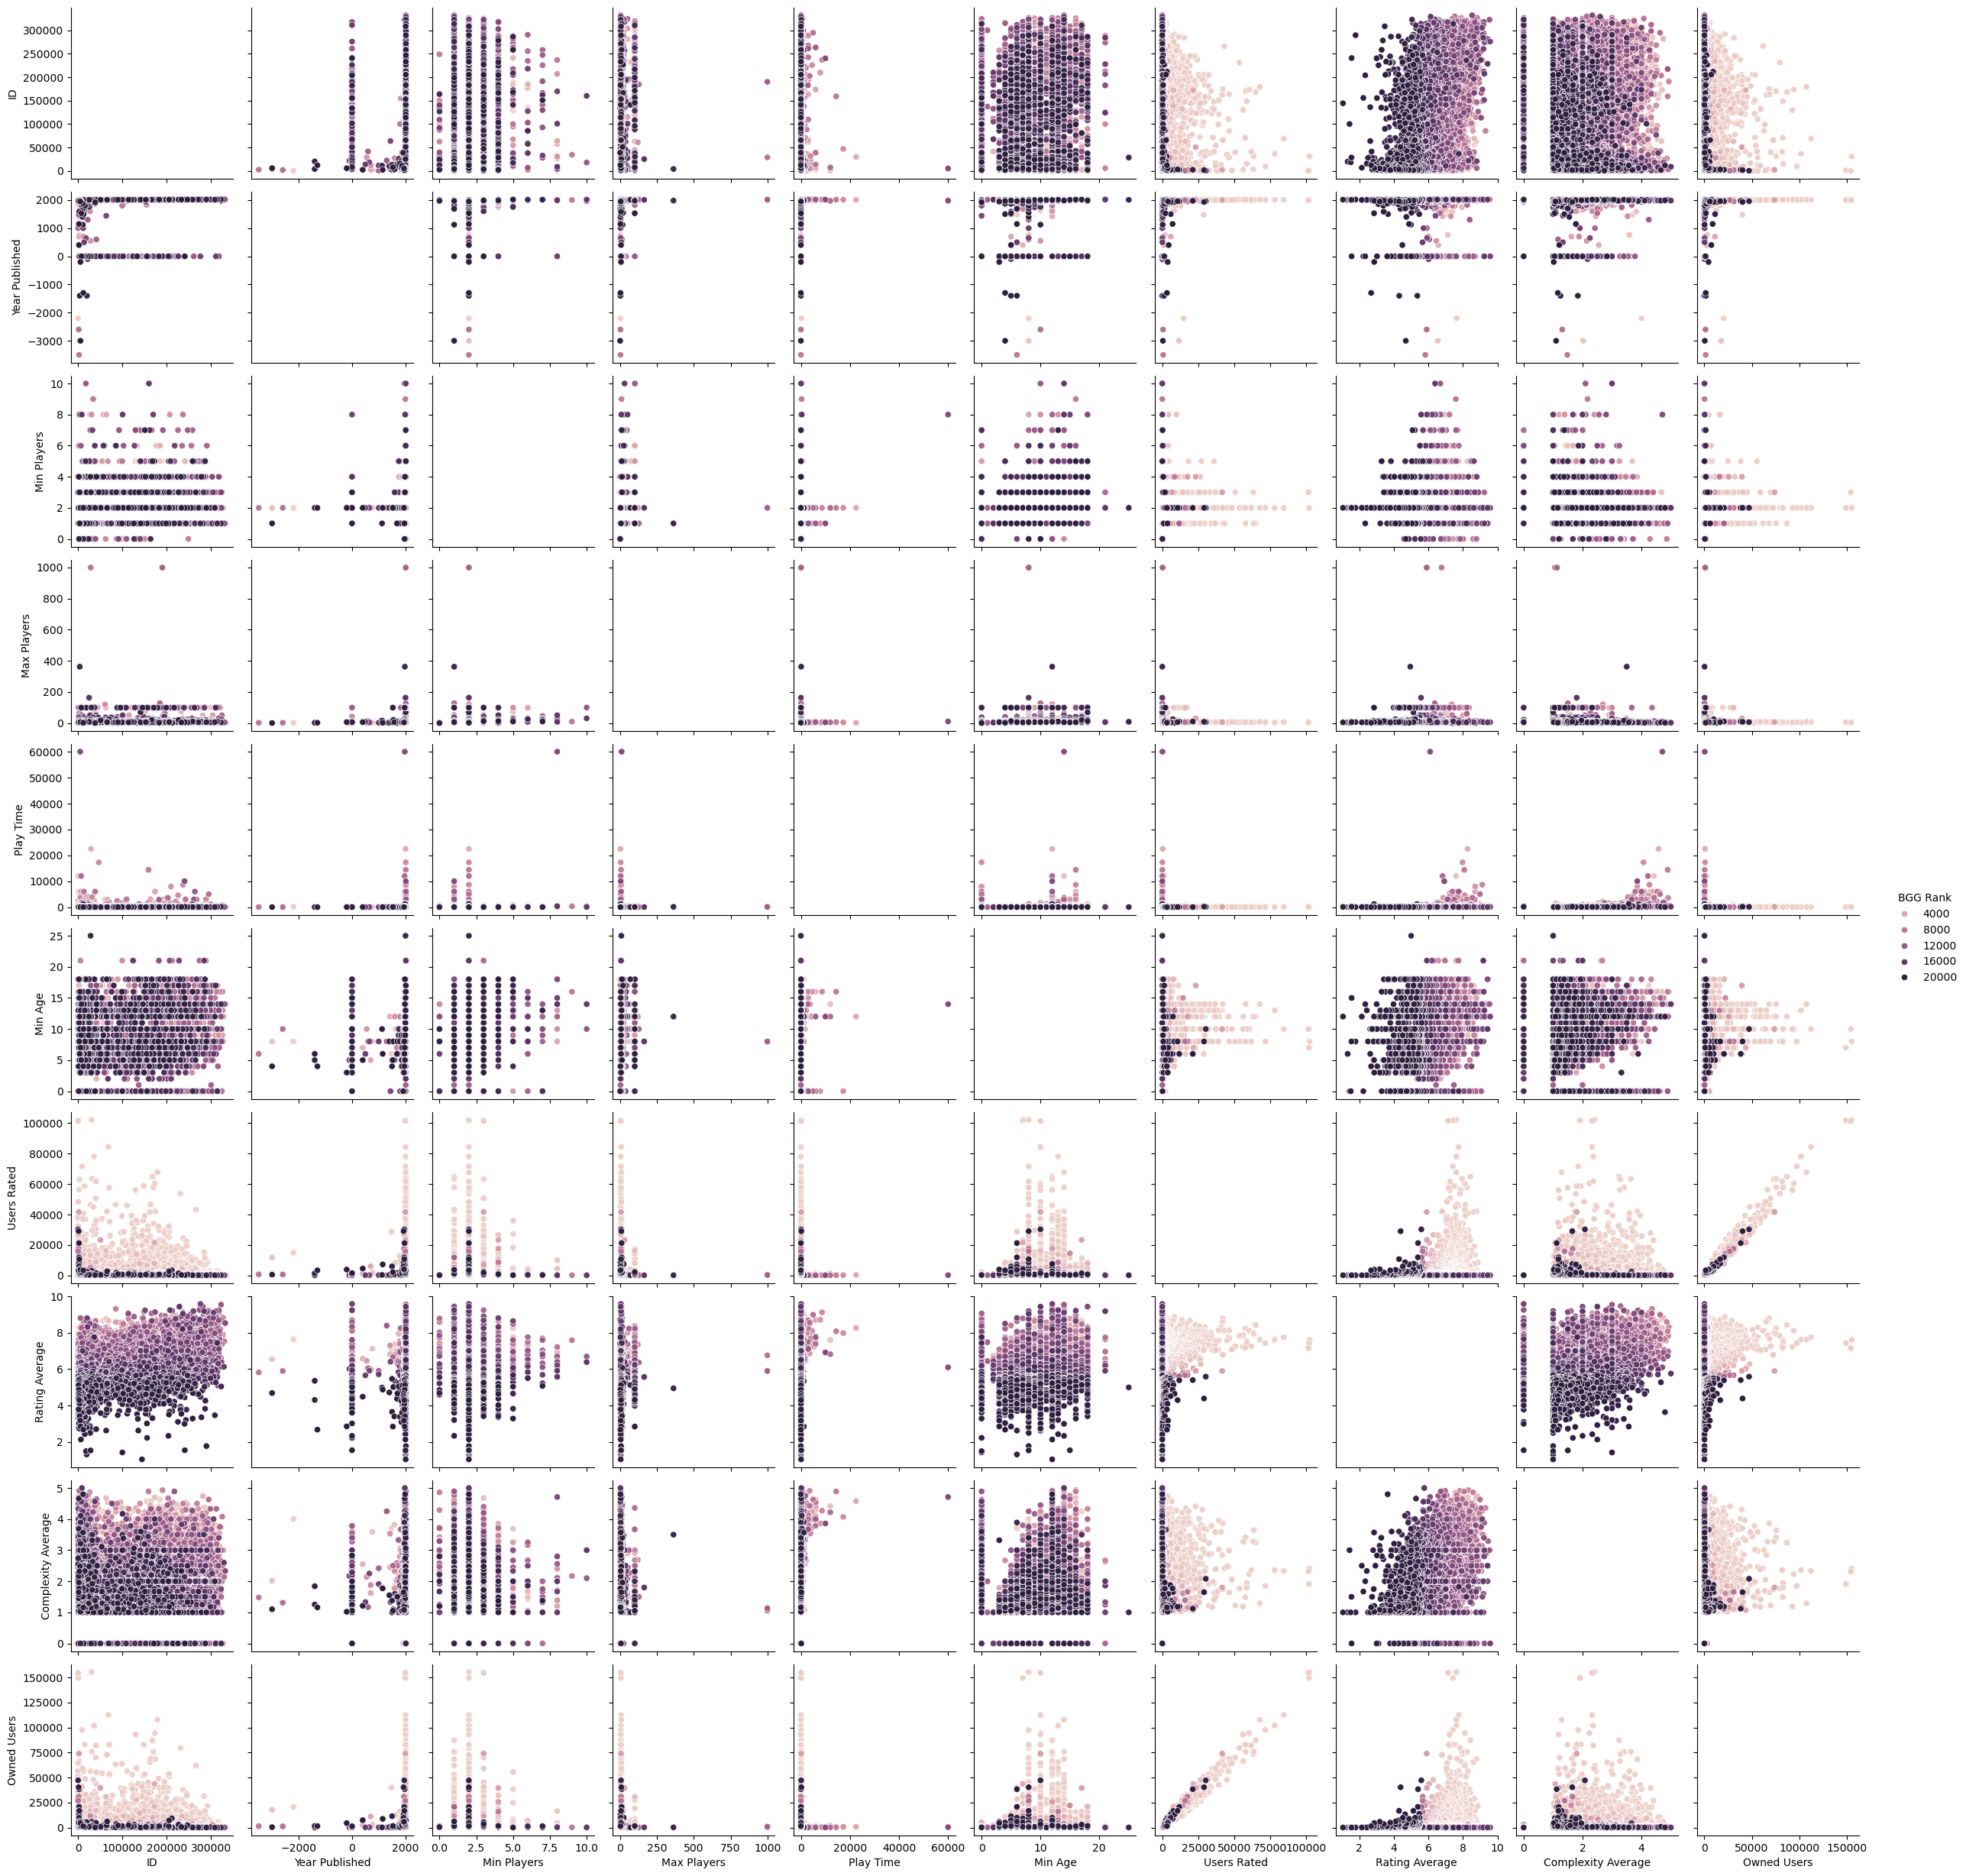

In [20]:
sns.pairplot(data=df, hue = 'BGG Rank')

Ящик с усами

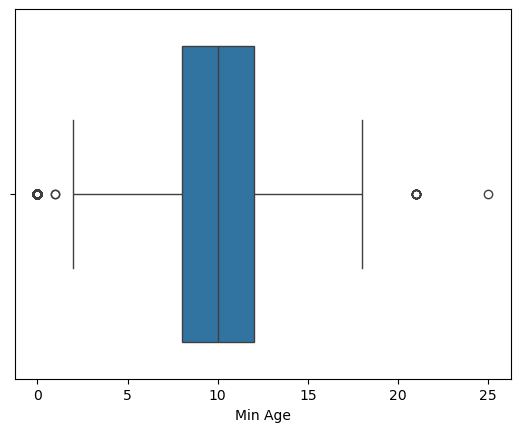

In [23]:
sns.boxplot(x=df['Min Age'])
plt.show()

Violin plot

<Axes: xlabel='Min Age'>

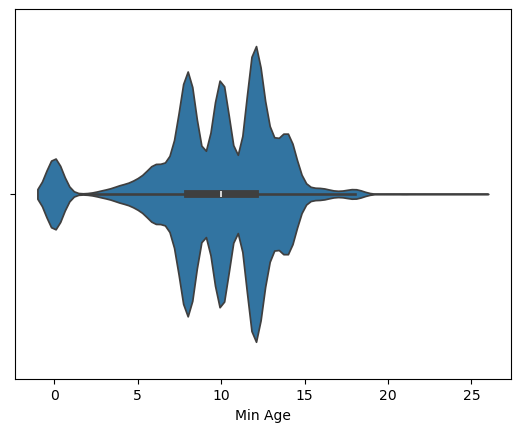

In [24]:
sns.violinplot(x=df['Min Age'])

C:\Users\пк\AppData\Local\Temp\ipykernel_69552\3469769762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Min Age'], ax=ax[1])


<Axes: xlabel='Min Age', ylabel='Density'>

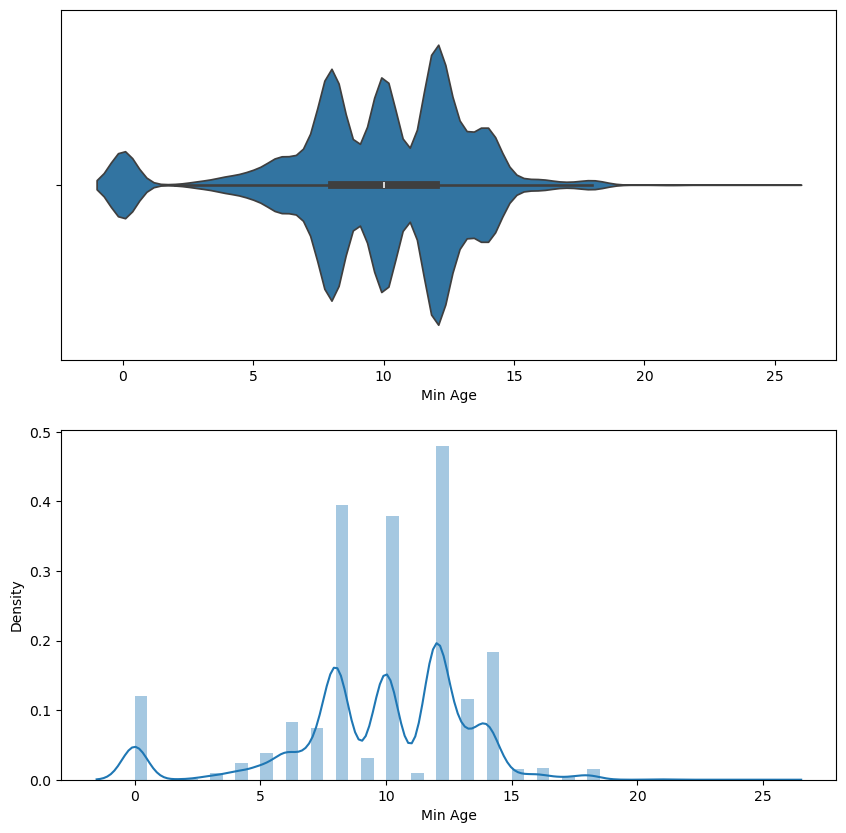

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['Min Age'])
sns.distplot(df['Min Age'], ax=ax[1])

## Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "BGG Rank"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [29]:
df.select_dtypes(include=['number']).corr()

ID  Year Published  Min Players  Max Players  \
ID                  1.000000        0.100060    -0.119717     0.020073   
Year Published      0.100060        1.000000    -0.018604    -0.005195   
Min Players        -0.119717       -0.018604     1.000000     0.085675   
Max Players         0.020073       -0.005195     0.085675     1.000000   
Play Time          -0.033407        0.007215     0.019545    -0.007844   
Min Age             0.097588        0.077678     0.033113     0.004332   
Users Rated        -0.023008        0.007419    -0.006832     0.001290   
Rating Average      0.396548        0.082413    -0.166572    -0.042562   
BGG Rank           -0.225988       -0.084759     0.095803     0.024980   
Complexity Average -0.083515        0.039604    -0.178875    -0.094093   
Owned Users        -0.002837        0.012543    -0.016514     0.002421   

                    Play Time   Min Age  Users Rated  Rating Average  \
ID                  -0.033407  0.097588    -0.023008        0.396548   
Year Published       0.007215  0.077678     0.007419        0.082413   
Min Players          0.019545  0.033113    -0.006832       -0.166572   
Max Players         -0.007844  0.004332     0.001290       -0.042562   
Play Time            1.000000  0.037920    -0.006269        0.088334   
Min Age              0.037920  1.000000     0.069570        0.191554   
Users Rated         -0.006269  0.069570     1.000000        0.167814   
Rating Average       0.088334  0.191554     0.167814        1.000000   
BGG Rank            -0.041734 -0.211749    -0.311955       -0.726035   
Complexity Average   0.182752  0.283321     0.078385        0.478060   
Owned Users         -0.004637  0.078060     0.986042        0.174504   

                    BGG Rank  Complexity Average  Owned Users  
ID                 -0.225988           -0.083515    -0.002837  
Year Published     -0.084759            0.039604     0.012543  
Min Players         0.095803           -0.178875    -0.016514  
Max Players         0.024980           -0.094093     0.002421  
Play Time          -0.041734            0.182752    -0.004637  
Min Age            -0.211749            0.283321     0.078060  
Users Rated        -0.311955            0.078385     0.986042  
Rating Average     -0.726035            0.478060     0.174504  
BGG Rank            1.000000           -0.368616    -0.330225  
Complexity Average -0.368616            1.000000     0.078924  
Owned Users        -0.330225            0.078924     1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
* Рейтинг (Rating Average) и BGG Rank:
Отрицательная корреляция -0.726 — чем выше рейтинг игры, тем ниже (лучше) её ранг на BoardGameGeek (поскольку ранг 1 — это топ-1 игра). Это логично, так как игры с высоким рейтингом должны занимать высокие места в рейтинге.

* Users Rated и Owned Users:
Корреляция 0.986 — почти идеальная положительная связь. Это означает, что игры, которыми владеет больше пользователей, также чаще оцениваются.

* Rating Average и Complexity Average:
Положительная корреляция 0.478 — игры с более высокой сложностью (Complexity) имеют тенденцию иметь рейтинг выше. Возможно, более сложные игры нравятся энтузиастам.

* Rating Average и Min Age:
Положительная корреляция 0.191 — игры для более старшей аудитории (Min Age) имеют тендецию иметь рейтинг выше, но связь слабая.

* BGG Rank и Complexity Average:
Отрицательная корреляция -0.368 — более сложные игры имеют тенденцию быть выше в рейтинге (поскольку ранг 1 лучше, чем 1000).

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [30]:
df.select_dtypes(include=['number']).corr(method='pearson')

ID  Year Published  Min Players  Max Players  \
ID                  1.000000        0.100060    -0.119717     0.020073   
Year Published      0.100060        1.000000    -0.018604    -0.005195   
Min Players        -0.119717       -0.018604     1.000000     0.085675   
Max Players         0.020073       -0.005195     0.085675     1.000000   
Play Time          -0.033407        0.007215     0.019545    -0.007844   
Min Age             0.097588        0.077678     0.033113     0.004332   
Users Rated        -0.023008        0.007419    -0.006832     0.001290   
Rating Average      0.396548        0.082413    -0.166572    -0.042562   
BGG Rank           -0.225988       -0.084759     0.095803     0.024980   
Complexity Average -0.083515        0.039604    -0.178875    -0.094093   
Owned Users        -0.002837        0.012543    -0.016514     0.002421   

                    Play Time   Min Age  Users Rated  Rating Average  \
ID                  -0.033407  0.097588    -0.023008        0.396548   
Year Published       0.007215  0.077678     0.007419        0.082413   
Min Players          0.019545  0.033113    -0.006832       -0.166572   
Max Players         -0.007844  0.004332     0.001290       -0.042562   
Play Time            1.000000  0.037920    -0.006269        0.088334   
Min Age              0.037920  1.000000     0.069570        0.191554   
Users Rated         -0.006269  0.069570     1.000000        0.167814   
Rating Average       0.088334  0.191554     0.167814        1.000000   
BGG Rank            -0.041734 -0.211749    -0.311955       -0.726035   
Complexity Average   0.182752  0.283321     0.078385        0.478060   
Owned Users         -0.004637  0.078060     0.986042        0.174504   

                    BGG Rank  Complexity Average  Owned Users  
ID                 -0.225988           -0.083515    -0.002837  
Year Published     -0.084759            0.039604     0.012543  
Min Players         0.095803           -0.178875    -0.016514  
Max Players         0.024980           -0.094093     0.002421  
Play Time          -0.041734            0.182752    -0.004637  
Min Age            -0.211749            0.283321     0.078060  
Users Rated        -0.311955            0.078385     0.986042  
Rating Average     -0.726035            0.478060     0.174504  
BGG Rank            1.000000           -0.368616    -0.330225  
Complexity Average -0.368616            1.000000     0.078924  
Owned Users        -0.330225            0.078924     1.000000

In [31]:
df.select_dtypes(include=['number']).corr(method='kendall')

ID  Year Published  Min Players  Max Players  \
ID                  1.000000        0.844379    -0.114289     0.038030   
Year Published      0.844379        1.000000    -0.113137     0.045122   
Min Players        -0.114289       -0.113137     1.000000     0.268368   
Max Players         0.038030        0.045122     0.268368     1.000000   
Play Time          -0.079291       -0.056869    -0.083604    -0.078320   
Min Age             0.054343        0.081003    -0.024216    -0.021746   
Users Rated        -0.020270        0.031599    -0.006121     0.061377   
Rating Average      0.267250        0.294959    -0.167370    -0.137499   
BGG Rank           -0.139874       -0.182370     0.087710     0.051570   
Complexity Average -0.047551       -0.021102    -0.153287    -0.222479   
Owned Users        -0.016795        0.038516    -0.040293     0.009638   

                    Play Time   Min Age  Users Rated  Rating Average  \
ID                  -0.079291  0.054343    -0.020270        0.267250   
Year Published      -0.056869  0.081003     0.031599        0.294959   
Min Players         -0.083604 -0.024216    -0.006121       -0.167370   
Max Players         -0.078320 -0.021746     0.061377       -0.137499   
Play Time            1.000000  0.363646     0.075634        0.253652   
Min Age              0.363646  1.000000     0.111963        0.211042   
Users Rated          0.075634  0.111963     1.000000        0.167693   
Rating Average       0.253652  0.211042     0.167693        1.000000   
BGG Rank            -0.168782 -0.177090    -0.567211       -0.567773   
Complexity Average   0.523741  0.338366     0.104250        0.356221   
Owned Users          0.128700  0.152176     0.782010        0.183531   

                    BGG Rank  Complexity Average  Owned Users  
ID                 -0.139874           -0.047551    -0.016795  
Year Published     -0.182370           -0.021102     0.038516  
Min Players         0.087710           -0.153287    -0.040293  
Max Players         0.051570           -0.222479     0.009638  
Play Time          -0.168782            0.523741     0.128700  
Min Age            -0.177090            0.338366     0.152176  
Users Rated        -0.567211            0.104250     0.782010  
Rating Average     -0.567773            0.356221     0.183531  
BGG Rank            1.000000           -0.259041    -0.543941  
Complexity Average -0.259041            1.000000     0.147749  
Owned Users        -0.543941            0.147749     1.000000

In [33]:
df.select_dtypes(include=['number']).corr(method='spearman')

ID  Year Published  Min Players  Max Players  \
ID                  1.000000        0.949633    -0.146372     0.052638   
Year Published      0.949633        1.000000    -0.143858     0.063521   
Min Players        -0.146372       -0.143858     1.000000     0.308055   
Max Players         0.052638        0.063521     0.308055     1.000000   
Play Time          -0.119153       -0.084200    -0.103201    -0.101145   
Min Age             0.076204        0.113382    -0.029615    -0.027895   
Users Rated        -0.028132        0.047074    -0.007890     0.084925   
Rating Average      0.394795        0.422483    -0.214608    -0.187856   
BGG Rank           -0.210193       -0.271807     0.112450     0.073173   
Complexity Average -0.070290       -0.030881    -0.193267    -0.298806   
Owned Users        -0.021840        0.056608    -0.051392     0.012785   

                    Play Time   Min Age  Users Rated  Rating Average  \
ID                  -0.119153  0.076204    -0.028132        0.394795   
Year Published      -0.084200  0.113382     0.047074        0.422483   
Min Players         -0.103201 -0.029615    -0.007890       -0.214608   
Max Players         -0.101145 -0.027895     0.084925       -0.187856   
Play Time            1.000000  0.459609     0.107241        0.355991   
Min Age              0.459609  1.000000     0.156274        0.285332   
Users Rated          0.107241  0.156274     1.000000        0.240359   
Rating Average       0.355991  0.285332     0.240359        1.000000   
BGG Rank            -0.244130 -0.248673    -0.731765       -0.742089   
Complexity Average   0.675134  0.436175     0.152076        0.505436   
Owned Users          0.187113  0.213188     0.930075        0.264617   

                    BGG Rank  Complexity Average  Owned Users  
ID                 -0.210193           -0.070290    -0.021840  
Year Published     -0.271807           -0.030881     0.056608  
Min Players         0.112450           -0.193267    -0.051392  
Max Players         0.073173           -0.298806     0.012785  
Play Time          -0.244130            0.675134     0.187113  
Min Age            -0.248673            0.436175     0.213188  
Users Rated        -0.731765            0.152076     0.930075  
Rating Average     -0.742089            0.505436     0.264617  
BGG Rank            1.000000           -0.383397    -0.710745  
Complexity Average -0.383397            1.000000     0.218580  
Owned Users        -0.710745            0.218580     1.000000

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

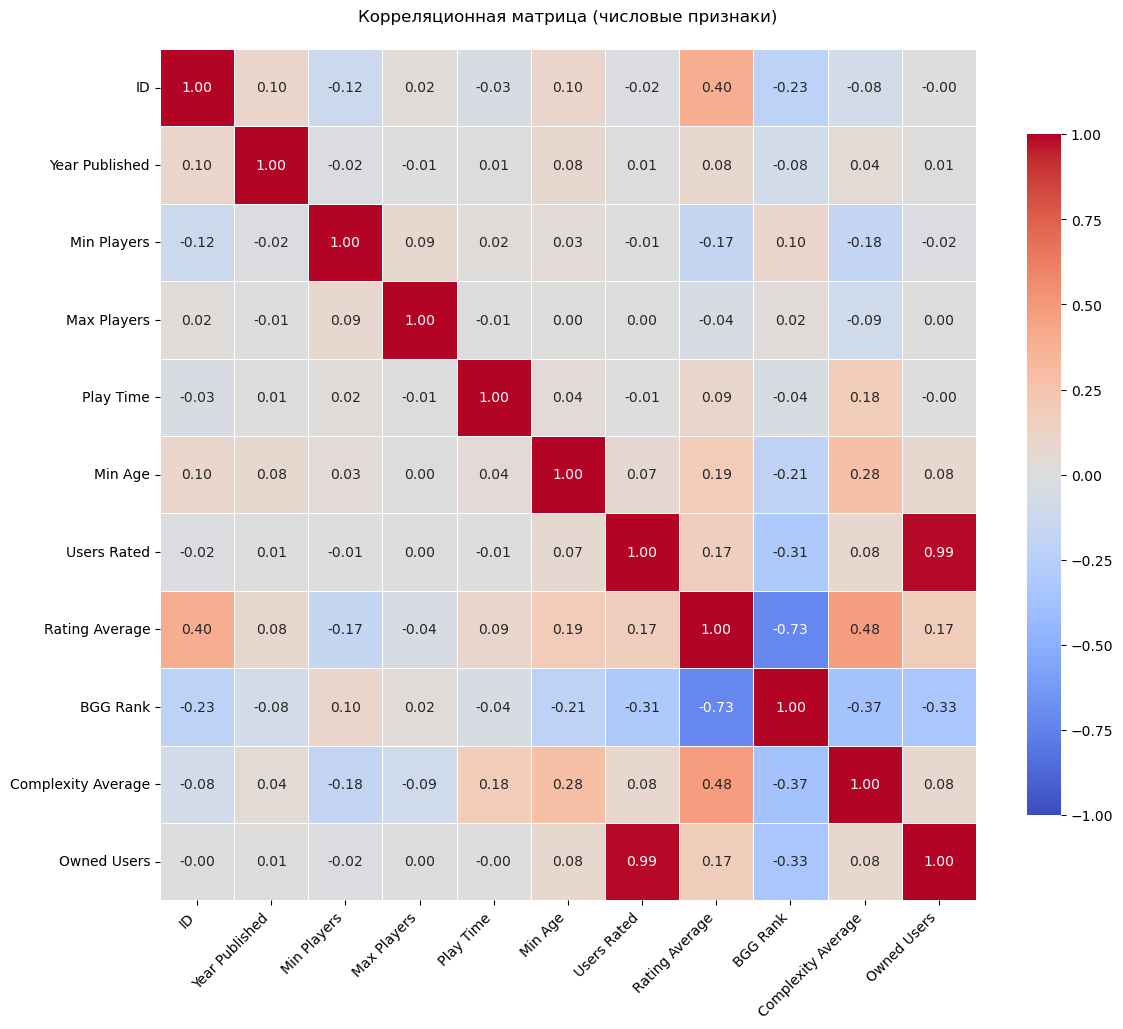

In [35]:
# Выбираем числовые данные и считаем корреляцию
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Настраиваем размер графика
plt.figure(figsize=(12, 10))

# Тепловая карта с улучшениями
sns.heatmap(
    correlation_matrix,
    annot=True,                # Показывать числа
    fmt=".2f",                # Формат чисел: 2 знака после запятой
    cmap='coolwarm',          # Цветовая схема
    vmin=-1, vmax=1,          # Диапазон для цветовой шкалы (-1 до 1)
    linewidths=0.5,           # Разделительные линии между ячейками
    annot_kws={"size": 10},   # Размер шрифта чисел
    cbar_kws={"shrink": 0.8}  # Размер цветовой шкалы
)

# Дополнительные настройки для читаемости
plt.xticks(rotation=45, ha='right', fontsize=10)  # Наклон подписей оси X
plt.yticks(rotation=0, fontsize=10)               # Выравнивание подписей оси Y
plt.tight_layout()                                # Автоподгонка layout
plt.title("Корреляционная матрица (числовые признаки)", pad=20)

plt.show()